In [1]:
# for basic operations
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks


In [3]:
df = pd.read_csv("data/df.csv")

df.head()

,index,product_id,product_type,product_name,size,colour,price,quantity_available_product,description,customer_id,...,quantity_product_sales,total_price,profit_per_product (dollar),total_profit (dollars),discount_per_product,profit_per_product_official,season,delivery_time (days),year_month,sales
0,0,218,Shirt,Chambray,L,orange,105,44,"A orange coloured, L sized, Chambray Shirt",64,...,2,212,1,2,0.00,0.95,Winter,25,2021-08-01,4620
1,1,481,Jacket,Puffer,S,indigo,110,62,"A indigo coloured, S sized, Puffer Jacket",64,...,1,118,8,8,0.00,7.27,Winter,25,2021-08-01,6820
2,2,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt",64,...,3,288,0,0,15.79,0.00,Winter,25,2021-08-01,6156
3,3,1002,Trousers,Wool,M,blue,111,52,"A blue coloured, M sized, Wool Trousers",64,...,2,212,0,0,4.50,0.00,Winter,25,2021-08-01,5772
4,4,691,Jacket,Parka,S,indigo,119,53,"A indigo coloured, S sized, Parka Jacket",64,...,3,339,0,0,5.04,0.00,Winter,25,2021-08-01,6307


In [4]:
df.dtypes

index                            int64
product_id                       int64
product_type                    object
product_name                    object
size                            object
colour                          object
price                            int64
quantity_available_product       int64
description                     object
customer_id                      int64
gender                          object
age                              int64
city                            object
state                           object
order_id                         int64
order_date                      object
delivery_date                   object
sales_id                         int64
price_per_unit                   int64
quantity_product_sales           int64
total_price                      int64
profit_per_product (dollar)      int64
total_profit (dollars)           int64
discount_per_product           float64
profit_per_product_official    float64
season                   

convert to datetime

after checking data types above, time series transformation will be carried out in columns 'order_date' and 'delivery_date' to convert to datetime type

check the data type of each value in the time series column

In [7]:
df_ts = ['order_date','delivery_date']

for i in df_ts:
    print('type',i,'before transformation is ',type(df[i][0]))

type order_date before transformation is  <class 'str'>
type delivery_date before transformation is  <class 'str'>


In [8]:
for i in df_ts:
    df[i] = pd.to_datetime(df[i],  format='%Y/%m/%d')
    print('type',i,'after transformation is ',type(df[i][0]))

type order_date after transformation is  <class 'pandas._libs.tslibs.timestamps.Timestamp'>
type delivery_date after transformation is  <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [9]:
df.dtypes

index                                   int64
product_id                              int64
product_type                           object
product_name                           object
size                                   object
colour                                 object
price                                   int64
quantity_available_product              int64
description                            object
customer_id                             int64
gender                                 object
age                                     int64
city                                   object
state                                  object
order_id                                int64
order_date                     datetime64[ns]
delivery_date                  datetime64[ns]
sales_id                                int64
price_per_unit                          int64
quantity_product_sales                  int64
total_price                             int64
profit_per_product (dollar)       

# 1. Sales Prediction

### 1.1 Import some necessary libraries

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

### 1.2 Data Preprocessing

**Feature Engineering**

In [19]:
df_prep = df.copy()

df_prep.dtypes

index                                   int64
product_id                              int64
product_type                           object
product_name                           object
size                                   object
colour                                 object
price                                   int64
quantity_available_product              int64
description                            object
customer_id                             int64
gender                                 object
age                                     int64
city                                   object
state                                  object
order_id                                int64
order_date                     datetime64[ns]
delivery_date                  datetime64[ns]
sales_id                                int64
price_per_unit                          int64
quantity_product_sales                  int64
total_price                             int64
profit_per_product (dollar)       

In [20]:
df_prep['week'] = df_prep['order_date'].dt.week
df_prep['day'] = df_prep['order_date'].dt.day
df_prep['order_month'] = df_prep['order_date'].dt.month
df_prep['order_date'] = df_prep['order_date'].dt.date


<ipython-input-20-e466eab87e06>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_prep['week'] = df_prep['order_date'].dt.week


In [21]:
# daily sales

df_prep = df_prep.groupby(['order_date','order_month','week','day','season','product_type'], as_index=False)['quantity_product_sales'].sum()

# pivot
df_prep_p = (
    df_prep
    .pivot_table(columns='product_type',index=['order_date','order_month','week','day','season'],aggfunc=np.sum,margins=True)['quantity_product_sales']
)

# Formatting.
df_prep_p.reset_index(inplace=True)
df_prep_p.columns.name = None

df_prep_p.columns = ['order_date','month','week','day','season','jacket','shirt','trousers','total_sales']
df_prep_p = df_prep_p[:-1]
df_prep_p

,order_date,month,week,day,season,jacket,shirt,trousers,total_sales
0,2021-01-01,1,53,1,Summer,4.0,13.0,14.0,31
1,2021-01-02,1,53,2,Summer,12.0,21.0,19.0,52
2,2021-01-03,1,53,3,Summer,11.0,2.0,12.0,25
3,2021-01-04,1,1,4,Summer,6.0,20.0,15.0,41
4,2021-01-05,1,1,5,Summer,25.0,11.0,20.0,56
...,...,...,...,...,...,...,...,...,...
286,2021-10-20,10,42,20,Spring,10.0,8.0,7.0,25
287,2021-10-21,10,42,21,Spring,15.0,20.0,26.0,61
288,2021-10-22,10,42,22,Spring,14.0,17.0,14.0,45
289,2021-10-23,10,42,23,Spring,1.0,11.0,8.0,20


**Standardisation**

In [22]:
df_pred = df_prep_p.copy()

In [23]:
from sklearn.preprocessing import StandardScaler

std_columns = ['month','week','day']

for i in std_columns:
    df_pred[i] = StandardScaler().fit_transform(df_pred[i].values.reshape(len(df_pred),1))

In [24]:
df_pred = df_pred[['month','week','day','total_sales']]

In [25]:

df_pred

,month,week,day,total_sales
0,-1.567358,2.499801,-1.663504,31
1,-1.567358,2.499801,-1.547999,52
2,-1.567358,2.499801,-1.432495,25
3,-1.567358,-1.670760,-1.316990,41
4,-1.567358,-1.670760,-1.201486,56
...,...,...,...,...
286,1.622160,1.617567,0.531083,25
287,1.622160,1.617567,0.646587,61
288,1.622160,1.617567,0.762092,45
289,1.622160,1.617567,0.877597,20


### 1.3 Model Evaluation

In [26]:
df_pred.shape

(291, 4)

In [27]:
# separate features and target
X = df_pred.drop(columns=['total_sales'], axis=1)
y = df_pred['total_sales']

In [28]:
# Split into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
m = len(X)
m_train = len(X_train)
m_test = len(X_test)

print("Total Data = " + str(m))
print("Train Data = " + str(m_train))
print("Test Data = " + str(m_test))

Total Data = 291
Train Data = 232
Test Data = 59


**Linear Regression**

In [29]:
#Fitting simple linear regression to the Training Set
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Prediction
pred = regressor.predict(X_test)

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def eval_regression(model, pred, xtrain, ytrain, xtest, ytest):
    print("MAE: %.2f" % mean_absolute_error(ytest, pred)) # The MAE
    print("RMSE: %.2f" % mean_squared_error(ytest, pred, squared=False)) # The RMSE
    print('R2 score: %.2f' % r2_score(ytest, pred)) # Explained variance score: 1 is perfect prediction

In [31]:
# evaluation

eval_regression(regressor, pred, X_train, y_train, X_test,y_test)

MAE: 18.38
RMSE: 22.18
R2 score: -0.10


In [32]:
df_prep_p['sales_prediction'] = regressor.predict(X)
df_prep_p

,order_date,month,week,day,season,jacket,shirt,trousers,total_sales,sales_prediction
0,2021-01-01,1,53,1,Summer,4.0,13.0,14.0,31,35.398683
1,2021-01-02,1,53,2,Summer,12.0,21.0,19.0,52,35.628060
2,2021-01-03,1,53,3,Summer,11.0,2.0,12.0,25,35.857437
3,2021-01-04,1,1,4,Summer,6.0,20.0,15.0,41,34.184114
4,2021-01-05,1,1,5,Summer,25.0,11.0,20.0,56,34.413491
...,...,...,...,...,...,...,...,...,...,...
286,2021-10-20,10,42,20,Spring,10.0,8.0,7.0,25,31.457654
287,2021-10-21,10,42,21,Spring,15.0,20.0,26.0,61,31.687032
288,2021-10-22,10,42,22,Spring,14.0,17.0,14.0,45,31.916409
289,2021-10-23,10,42,23,Spring,1.0,11.0,8.0,20,32.145786


In [33]:
# monthly
df_ml = df_prep_p.groupby(['month'], as_index=False)['total_sales'].sum()
df_ml_pred = df_prep_p.groupby(['month'], as_index=False)['sales_prediction'].sum()

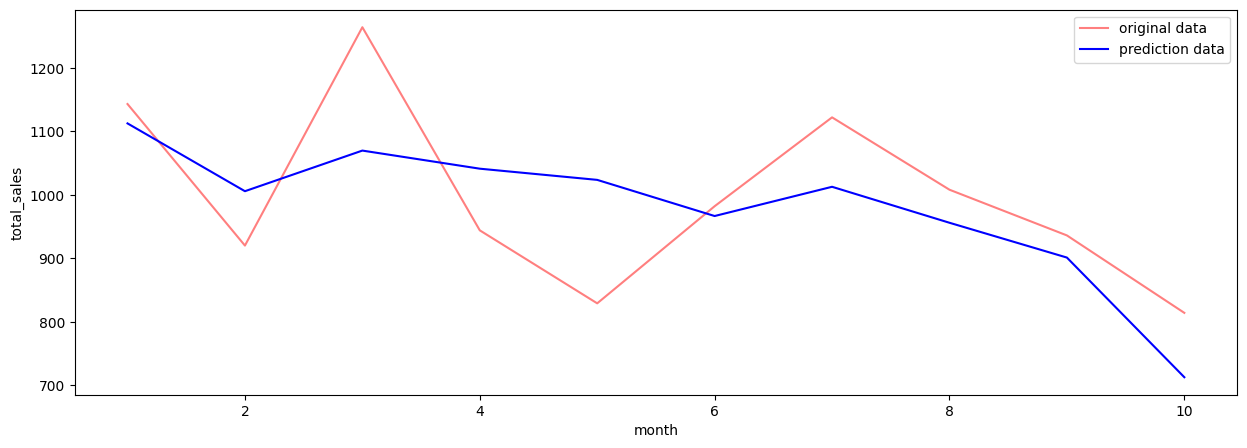

In [34]:
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(1, 1, 1)

sns.lineplot(data=df_ml, x='month',y='total_sales',ax=ax, color='red',alpha=0.5, label='original data')
sns.lineplot(data=df_ml_pred, x='month',y='sales_prediction',ax=ax, color='blue', label='prediction data')

plt.show()

**sales forecast in november and december**

In [35]:
# november and december
df_pred_sales = pd.DataFrame(pd.date_range(start="2021-01-01",end="2021-12-31"), columns=['order_date'])

from_ts = pd.to_datetime('2021-10-24')
to_ts = pd.to_datetime('2021-10-31')
df_pred_sales = df_pred_sales[~((df_pred_sales.order_date > from_ts) & (df_pred_sales.order_date <= to_ts))]

In [36]:
df_pred_sales

,order_date
0,2021-01-01
1,2021-01-02
2,2021-01-03
3,2021-01-04
4,2021-01-05
...,...
360,2021-12-27
361,2021-12-28
362,2021-12-29
363,2021-12-30


In [37]:
df_pred_sales['month'] = df_pred_sales['order_date'].dt.month
df_pred_sales['week'] = df_pred_sales['order_date'].dt.week
df_pred_sales['day'] = df_pred_sales['order_date'].dt.day
# df_pred_sales['order_date'] = df_pred_sales['order_date'].dt.date
df_pred_sales

<ipython-input-37-4979a05fc278>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_pred_sales['week'] = df_pred_sales['order_date'].dt.week


,order_date,month,week,day
0,2021-01-01,1,53,1
1,2021-01-02,1,53,2
2,2021-01-03,1,53,3
3,2021-01-04,1,1,4
4,2021-01-05,1,1,5
...,...,...,...,...
360,2021-12-27,12,52,27
361,2021-12-28,12,52,28
362,2021-12-29,12,52,29
363,2021-12-30,12,52,30


In [38]:
df_pred_sales_std = df_pred_sales.copy()

In [39]:
std_columns = ['month','week','day']

for i in std_columns:
    df_pred_sales_std[i] = StandardScaler().fit_transform(df_pred_sales_std[i].values.reshape(len(df_pred_sales_std),1))

In [40]:
df_pred_sales['sales_prediction'] = regressor.predict(df_pred_sales_std.drop(columns=['order_date'], axis=1))
df_pred_sales

,order_date,month,week,day,sales_prediction
0,2021-01-01,1,53,1,35.110812
1,2021-01-02,1,53,2,35.338903
2,2021-01-03,1,53,3,35.566994
3,2021-01-04,1,1,4,34.216653
4,2021-01-05,1,1,5,34.444744
...,...,...,...,...,...
360,2021-12-27,12,52,27,33.109254
361,2021-12-28,12,52,28,33.337346
362,2021-12-29,12,52,29,33.565437
363,2021-12-30,12,52,30,33.793528


In [41]:
# monthly
df_ml_pred_nov = df_pred_sales.groupby(['month'], as_index=False)['sales_prediction'].sum()

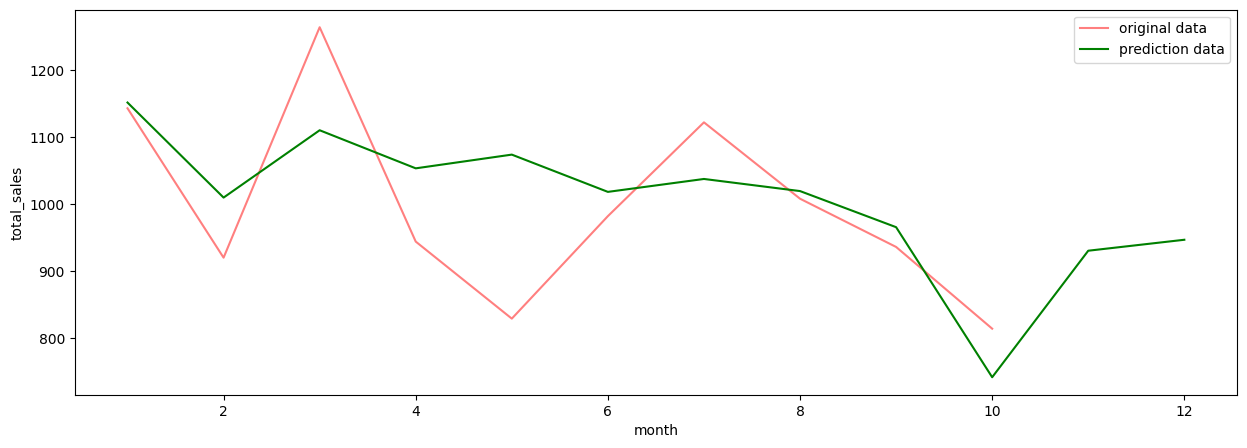

In [42]:
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(1, 1, 1)

sns.lineplot(data=df_ml, x='month',y='total_sales',ax=ax, color='red',alpha=0.5, label='original data')
sns.lineplot(data=df_ml_pred_nov, x='month',y='sales_prediction',ax=ax, color='green', label='prediction data')

plt.legend()
plt.show()

# 2. Jacket Sales Prediction

### 2.1 Data Preprocessing

**Feature Engineering**

In [43]:
df_prep_jacket = df.copy()

In [44]:
df_prep_jacket['month'] = df_prep_jacket['order_date'].dt.month
df_prep_jacket['week'] = df_prep_jacket['order_date'].dt.week
df_prep_jacket['day'] = df_prep_jacket['order_date'].dt.day
df_prep_jacket['order_date'] = df_prep_jacket['order_date'].dt.date

<ipython-input-44-53571ee0ae4c>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_prep_jacket['week'] = df_prep_jacket['order_date'].dt.week


In [45]:
# daily sales

df_prep_jacket = df_prep_jacket.groupby(['order_date','month','week','day','season','product_type'], as_index=False)['quantity_product_sales'].sum()

# pivot
df_prep_jacket_p = (
    df_prep_jacket
    .pivot_table(columns='product_type',index=['order_date','month','week','day','season'],aggfunc=np.sum,margins=True)['quantity_product_sales']
)

# Formatting.
df_prep_jacket_p.reset_index(inplace=True)
df_prep_jacket_p.columns.name = None

df_prep_jacket_p.columns = ['order_date','month','week','day','season','jacket','shirt','trousers','total_sales']
df_prep_jacket_p = df_prep_jacket_p[:-1]
df_prep_jacket_p

,order_date,month,week,day,season,jacket,shirt,trousers,total_sales
0,2021-01-01,1,53,1,Summer,4.0,13.0,14.0,31
1,2021-01-02,1,53,2,Summer,12.0,21.0,19.0,52
2,2021-01-03,1,53,3,Summer,11.0,2.0,12.0,25
3,2021-01-04,1,1,4,Summer,6.0,20.0,15.0,41
4,2021-01-05,1,1,5,Summer,25.0,11.0,20.0,56
...,...,...,...,...,...,...,...,...,...
286,2021-10-20,10,42,20,Spring,10.0,8.0,7.0,25
287,2021-10-21,10,42,21,Spring,15.0,20.0,26.0,61
288,2021-10-22,10,42,22,Spring,14.0,17.0,14.0,45
289,2021-10-23,10,42,23,Spring,1.0,11.0,8.0,20


**Standardisation**

In [46]:
df_pred_jacket = df_prep_jacket_p.copy()

In [47]:

from sklearn.preprocessing import StandardScaler

std_columns = ['month','week','day']

for i in std_columns:
    df_pred_jacket[i] = StandardScaler().fit_transform(df_pred_jacket[i].values.reshape(len(df_pred_jacket),1))

In [48]:
df_pred_jacket = df_pred_jacket[['month','week','day','jacket']]

In [49]:
df_pred_jacket['jacket'].fillna(df_pred_jacket['jacket'].mean(), inplace=True)

### 2.2 Model Evaluation

In [50]:
df_pred_jacket.shape

(291, 4)

In [51]:
# separate features and target
X = df_pred_jacket.drop(columns=['jacket'], axis=1)
y = df_pred_jacket['jacket']

In [52]:
# Split into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
m = len(X)
m_train = len(X_train)
m_test = len(X_test)

print("Total Data = " + str(m))
print("Train Data = " + str(m_train))
print("Test Data = " + str(m_test))

Total Data = 291
Train Data = 232
Test Data = 59


**Linear Regression**

In [53]:
#Fitting simple linear regression to the Training Set
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Prediction
pred_jacket = regressor.predict(X_test)

In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def eval_regression(model, pred, xtrain, ytrain, xtest, ytest):
    print("MAE: %.2f" % mean_absolute_error(ytest, pred_jacket)) # The MAE
    print("RMSE: %.2f" % mean_squared_error(ytest, pred_jacket, squared=False)) # The RMSE
    print('R2 score: %.2f' % r2_score(ytest, pred_jacket)) # Explained variance score: 1 is perfect prediction

In [55]:

# evaluation

eval_regression(regressor, pred, X_train, y_train, X_test,y_test)

MAE: 7.14
RMSE: 9.22
R2 score: -0.07


In [56]:
df_prep_jacket_p['jacket_prediction'] = regressor.predict(X)
df_prep_jacket_p

,order_date,month,week,day,season,jacket,shirt,trousers,total_sales,jacket_prediction
0,2021-01-01,1,53,1,Summer,4.0,13.0,14.0,31,8.854399
1,2021-01-02,1,53,2,Summer,12.0,21.0,19.0,52,8.958534
2,2021-01-03,1,53,3,Summer,11.0,2.0,12.0,25,9.062669
3,2021-01-04,1,1,4,Summer,6.0,20.0,15.0,41,11.807883
4,2021-01-05,1,1,5,Summer,25.0,11.0,20.0,56,11.912018
...,...,...,...,...,...,...,...,...,...,...
286,2021-10-20,10,42,20,Spring,10.0,8.0,7.0,25,11.129182
287,2021-10-21,10,42,21,Spring,15.0,20.0,26.0,61,11.233317
288,2021-10-22,10,42,22,Spring,14.0,17.0,14.0,45,11.337452
289,2021-10-23,10,42,23,Spring,1.0,11.0,8.0,20,11.441587


In [57]:
# monthly
df_ml_jacket = df_prep_jacket_p.groupby(['month'], as_index=False)['jacket'].sum()
df_ml_jacket_pred = df_prep_jacket_p.groupby(['month'], as_index=False)['jacket_prediction'].sum()

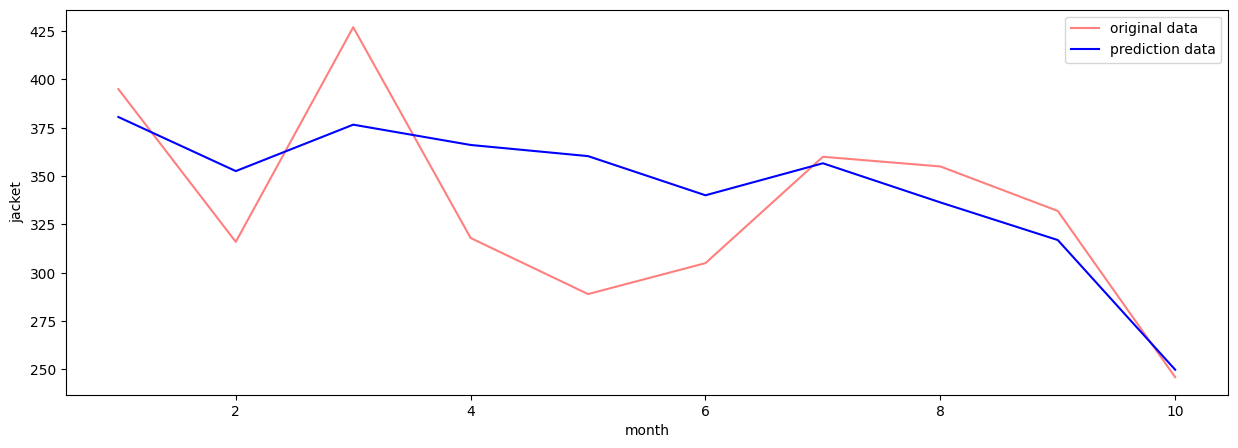

In [58]:
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(1, 1, 1)

sns.lineplot(data=df_ml_jacket, x='month',y='jacket',ax=ax, color='red',alpha=0.5, label='original data')
sns.lineplot(data=df_ml_jacket_pred, x='month',y='jacket_prediction',ax=ax, color='blue', label='prediction data')

plt.show()

**prediction of jacket sales in november and december**

In [59]:
# november and december
df_pred_jacket_sales = pd.DataFrame(pd.date_range(start="2021-01-01",end="2021-12-31"), columns=['order_date'])

from_ts = pd.to_datetime('2021-10-24')
to_ts = pd.to_datetime('2021-10-31')
df_pred_jacket_sales = df_pred_jacket_sales[~((df_pred_jacket_sales.order_date > from_ts) & (df_pred_sales.order_date <= to_ts))]

In [60]:
df_pred_jacket_sales

,order_date
0,2021-01-01
1,2021-01-02
2,2021-01-03
3,2021-01-04
4,2021-01-05
...,...
360,2021-12-27
361,2021-12-28
362,2021-12-29
363,2021-12-30


In [61]:
df_pred_jacket_sales['month'] = df_pred_jacket_sales['order_date'].dt.month
df_pred_jacket_sales['week'] = df_pred_jacket_sales['order_date'].dt.week
df_pred_jacket_sales['day'] = df_pred_jacket_sales['order_date'].dt.day
# df_pred_jacket_sales['order_date'] = df_pred_jacket_sales['order_date'].dt.date
df_pred_jacket_sales

<ipython-input-61-ddb2b91d3ceb>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_pred_jacket_sales['week'] = df_pred_jacket_sales['order_date'].dt.week


,order_date,month,week,day
0,2021-01-01,1,53,1
1,2021-01-02,1,53,2
2,2021-01-03,1,53,3
3,2021-01-04,1,1,4
4,2021-01-05,1,1,5
...,...,...,...,...
360,2021-12-27,12,52,27
361,2021-12-28,12,52,28
362,2021-12-29,12,52,29
363,2021-12-30,12,52,30


In [62]:
df_pred_jacket_sales_std = df_pred_jacket_sales.copy()

In [63]:
std_columns = ['month','week','day']

for i in std_columns:
    df_pred_jacket_sales_std[i] = StandardScaler().fit_transform(df_pred_jacket_sales_std[i].values.reshape(len(df_pred_jacket_sales_std),1))



In [64]:
df_pred_jacket_sales['jacket_prediction'] = regressor.predict(df_pred_jacket_sales_std.drop(columns=['order_date'], axis=1))
df_pred_jacket_sales

,order_date,month,week,day,jacket_prediction
0,2021-01-01,1,53,1,9.320385
1,2021-01-02,1,53,2,9.422879
2,2021-01-03,1,53,3,9.525374
3,2021-01-04,1,1,4,11.814293
4,2021-01-05,1,1,5,11.916787
...,...,...,...,...,...
360,2021-12-27,12,52,27,11.764742
361,2021-12-28,12,52,28,11.867237
362,2021-12-29,12,52,29,11.969731
363,2021-12-30,12,52,30,12.072225


In [65]:
# monthly
df_ml_jacket_pred_nov = df_pred_jacket_sales.groupby(['month'], as_index=False)['jacket_prediction'].sum()

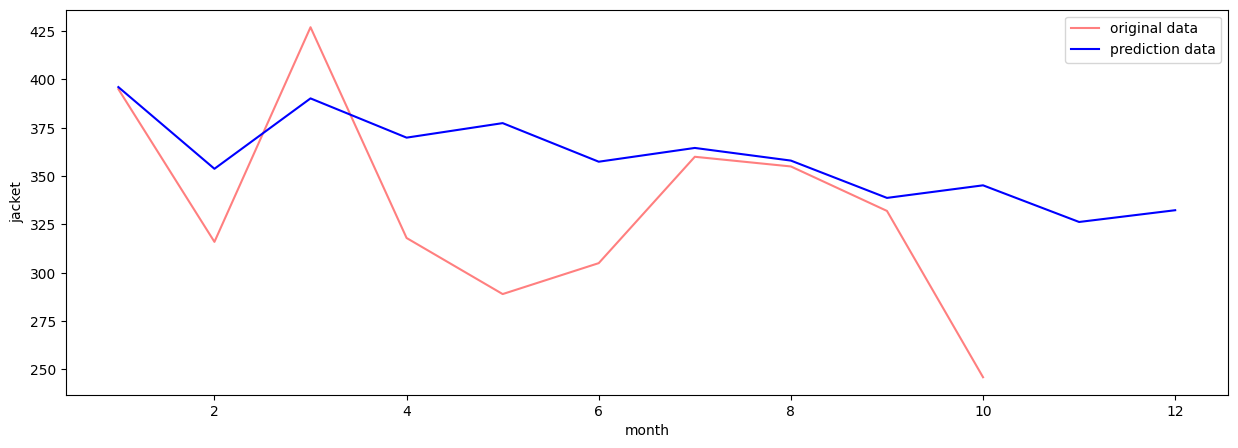

In [66]:
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(1, 1, 1)

sns.lineplot(data=df_ml_jacket, x='month',y='jacket',ax=ax, color='red',alpha=0.5, label='original data')
sns.lineplot(data=df_ml_jacket_pred_nov, x='month',y='jacket_prediction',ax=ax, color='blue', label='prediction data')

plt.show()

# 3. Trousers Sales Prediction

### 3.1 Data Preprocessing

**Feature Engineering**

In [67]:
df_prep_trousers = df.copy()

In [68]:
df_prep_trousers['month'] = df_prep_trousers['order_date'].dt.month
df_prep_trousers['week'] = df_prep_trousers['order_date'].dt.week
df_prep_trousers['day'] = df_prep_trousers['order_date'].dt.day
df_prep_trousers['order_date'] = df_prep_trousers['order_date'].dt.date

<ipython-input-68-35d5ec7d3591>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_prep_trousers['week'] = df_prep_trousers['order_date'].dt.week


In [69]:
# daily sales

df_prep_trousers = df_prep_trousers.groupby(['order_date','month','week','day','season','product_type'], as_index=False)['quantity_product_sales'].sum()

# pivot
df_prep_trousers_p = (
    df_prep_trousers
    .pivot_table(columns='product_type',index=['order_date','month','week','day','season'],aggfunc=np.sum,margins=True)['quantity_product_sales']
)

# Formatting.
df_prep_trousers_p.reset_index(inplace=True)
df_prep_trousers_p.columns.name = None

df_prep_trousers_p.columns = ['order_date','month','week','day','season','jacket','shirt','trousers','total_sales']
df_prep_trousers_p = df_prep_trousers_p[:-1]
df_prep_trousers_p

,order_date,month,week,day,season,jacket,shirt,trousers,total_sales
0,2021-01-01,1,53,1,Summer,4.0,13.0,14.0,31
1,2021-01-02,1,53,2,Summer,12.0,21.0,19.0,52
2,2021-01-03,1,53,3,Summer,11.0,2.0,12.0,25
3,2021-01-04,1,1,4,Summer,6.0,20.0,15.0,41
4,2021-01-05,1,1,5,Summer,25.0,11.0,20.0,56
...,...,...,...,...,...,...,...,...,...
286,2021-10-20,10,42,20,Spring,10.0,8.0,7.0,25
287,2021-10-21,10,42,21,Spring,15.0,20.0,26.0,61
288,2021-10-22,10,42,22,Spring,14.0,17.0,14.0,45
289,2021-10-23,10,42,23,Spring,1.0,11.0,8.0,20


**Standardisation**

In [70]:
df_pred_trousers = df_prep_trousers_p.copy()

In [71]:
from sklearn.preprocessing import StandardScaler

std_columns = ['month','week','day']

for i in std_columns:
    df_pred_trousers[i] = StandardScaler().fit_transform(df_pred_trousers[i].values.reshape(len(df_pred_trousers),1))

In [72]:
df_pred_trousers = df_pred_trousers[['month','week','day','trousers']]

In [73]:
df_pred_trousers

,month,week,day,trousers
0,-1.567358,2.499801,-1.663504,14.0
1,-1.567358,2.499801,-1.547999,19.0
2,-1.567358,2.499801,-1.432495,12.0
3,-1.567358,-1.670760,-1.316990,15.0
4,-1.567358,-1.670760,-1.201486,20.0
...,...,...,...,...
286,1.622160,1.617567,0.531083,7.0
287,1.622160,1.617567,0.646587,26.0
288,1.622160,1.617567,0.762092,14.0
289,1.622160,1.617567,0.877597,8.0


In [74]:
df_pred_trousers['trousers'].fillna(df_pred_trousers['trousers'].mean(), inplace=True)

### 3.2 Model Evaluation

In [75]:
df_pred_trousers.shape

(291, 4)

In [76]:

# separate features and target
X = df_pred_trousers.drop(columns=['trousers'], axis=1)
y = df_pred_trousers['trousers']

In [77]:
# Split into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
m = len(X)
m_train = len(X_train)
m_test = len(X_test)

print("Total Data = " + str(m))
print("Train Data = " + str(m_train))
print("Test Data = " + str(m_test))

Total Data = 291
Train Data = 232
Test Data = 59


**Linear Regression**

In [78]:
#Fitting simple linear regression to the Training Set
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Prediction
pred_trousers = regressor.predict(X_test)

In [79]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def eval_regression(model, pred, xtrain, ytrain, xtest, ytest):
    print("MAE: %.2f" % mean_absolute_error(ytest, pred_trousers)) # The MAE
    print("RMSE: %.2f" % mean_squared_error(ytest, pred_trousers, squared=False)) # The RMSE
    print('R2 score: %.2f' % r2_score(ytest, pred_trousers)) # Explained variance score: 1 is perfect prediction

In [80]:
# evaluation

eval_regression(regressor, pred, X_train, y_train, X_test,y_test)

MAE: 5.97
RMSE: 7.47
R2 score: -0.08


In [81]:
df_prep_trousers_p['trousers_prediction'] = regressor.predict(X)
df_prep_trousers_p

,order_date,month,week,day,season,jacket,shirt,trousers,total_sales,trousers_prediction
0,2021-01-01,1,53,1,Summer,4.0,13.0,14.0,31,14.739787
1,2021-01-02,1,53,2,Summer,12.0,21.0,19.0,52,14.842097
2,2021-01-03,1,53,3,Summer,11.0,2.0,12.0,25,14.944406
3,2021-01-04,1,1,4,Summer,6.0,20.0,15.0,41,11.562323
4,2021-01-05,1,1,5,Summer,25.0,11.0,20.0,56,11.664633
...,...,...,...,...,...,...,...,...,...,...
286,2021-10-20,10,42,20,Spring,10.0,8.0,7.0,25,11.732799
287,2021-10-21,10,42,21,Spring,15.0,20.0,26.0,61,11.835109
288,2021-10-22,10,42,22,Spring,14.0,17.0,14.0,45,11.937418
289,2021-10-23,10,42,23,Spring,1.0,11.0,8.0,20,12.039728


In [82]:
# monthly
df_ml_trousers = df_prep_trousers_p.groupby(['month'], as_index=False)['trousers'].sum()
df_ml_trousers_pred = df_prep_trousers_p.groupby(['month'], as_index=False)['trousers_prediction'].sum()

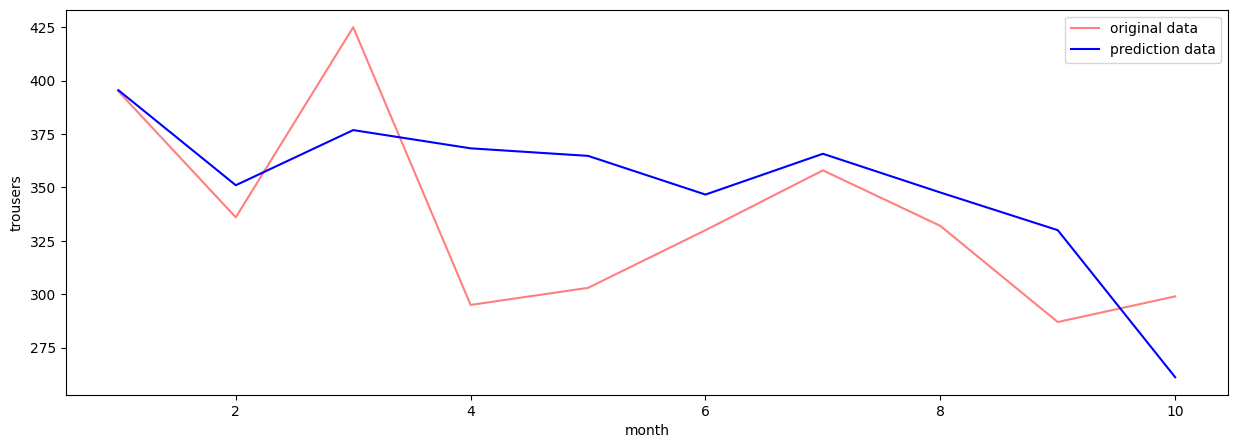

In [83]:
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(1, 1, 1)

sns.lineplot(data=df_ml_trousers, x='month',y='trousers',ax=ax, color='red',alpha=0.5, label='original data')
sns.lineplot(data=df_ml_trousers_pred, x='month',y='trousers_prediction',ax=ax, color='blue', label='prediction data')

plt.show()

**prediction of trousers sales in november and december**

In [84]:
# november and december
df_pred_trousers_sales = pd.DataFrame(pd.date_range(start="2021-01-01",end="2021-12-31"), columns=['order_date'])

from_ts = pd.to_datetime('2021-10-24')
to_ts = pd.to_datetime('2021-10-31')
df_pred_trousers_sales = df_pred_trousers_sales[~((df_pred_trousers_sales.order_date > from_ts) & (df_pred_sales.order_date <= to_ts))]

In [85]:

df_pred_trousers_sales

,order_date
0,2021-01-01
1,2021-01-02
2,2021-01-03
3,2021-01-04
4,2021-01-05
...,...
360,2021-12-27
361,2021-12-28
362,2021-12-29
363,2021-12-30


In [86]:
df_pred_trousers_sales['month'] = df_pred_trousers_sales['order_date'].dt.month
df_pred_trousers_sales['week'] = df_pred_trousers_sales['order_date'].dt.week
df_pred_trousers_sales['day'] = df_pred_trousers_sales['order_date'].dt.day
# df_pred_trousers_sales['order_date'] = df_pred_trousers_sales['order_date'].dt.date
df_pred_trousers_sales

<ipython-input-86-7113a1b5766f>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_pred_trousers_sales['week'] = df_pred_trousers_sales['order_date'].dt.week


,order_date,month,week,day
0,2021-01-01,1,53,1
1,2021-01-02,1,53,2
2,2021-01-03,1,53,3
3,2021-01-04,1,1,4
4,2021-01-05,1,1,5
...,...,...,...,...
360,2021-12-27,12,52,27
361,2021-12-28,12,52,28
362,2021-12-29,12,52,29
363,2021-12-30,12,52,30


In [87]:
df_pred_trousers_sales_std = df_pred_trousers_sales.copy()

In [88]:
std_columns = ['month','week','day']

for i in std_columns:
    df_pred_trousers_sales_std[i] = StandardScaler().fit_transform(df_pred_trousers_sales_std[i].values.reshape(len(df_pred_trousers_sales_std),1))

In [89]:
df_pred_trousers_sales['trousers_prediction'] = regressor.predict(df_pred_trousers_sales_std.drop(columns=['order_date'], axis=1))
df_pred_trousers_sales

,order_date,month,week,day,trousers_prediction
0,2021-01-01,1,53,1,14.154852
1,2021-01-02,1,53,2,14.255550
2,2021-01-03,1,53,3,14.356247
3,2021-01-04,1,1,4,11.572381
4,2021-01-05,1,1,5,11.673079
...,...,...,...,...,...
360,2021-12-27,12,52,27,12.502577
361,2021-12-28,12,52,28,12.603275
362,2021-12-29,12,52,29,12.703972
363,2021-12-30,12,52,30,12.804670


In [90]:
# monthly
df_ml_trousers_pred_nov = df_pred_trousers_sales.groupby(['month'], as_index=False)['trousers_prediction'].sum()

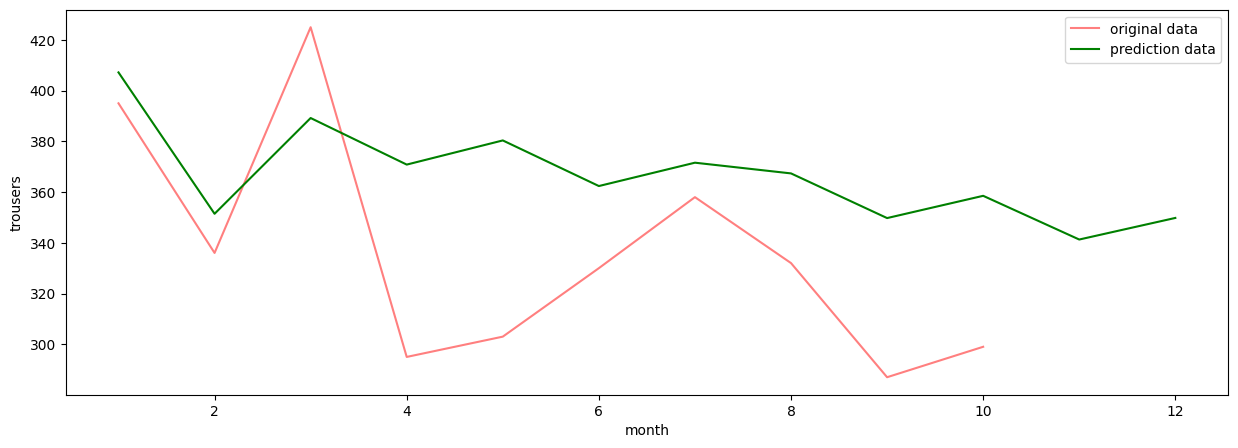

In [91]:
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(1, 1, 1)

sns.lineplot(data=df_ml_trousers, x='month',y='trousers',ax=ax, color='red',alpha=0.5, label='original data')
sns.lineplot(data=df_ml_trousers_pred_nov, x='month',y='trousers_prediction',ax=ax, color='green', label='prediction data')

plt.legend()
plt.show()

# 4. Shirt Sales Prediction

### 4.1 Data Preprocessing

**Feature Engineering**

In [92]:
df_prep_shirt = df.copy()

In [93]:
df_prep_shirt['month'] = df_prep_shirt['order_date'].dt.month
df_prep_shirt['week'] = df_prep_shirt['order_date'].dt.week
df_prep_shirt['day'] = df_prep_shirt['order_date'].dt.day
df_prep_shirt['order_date'] = df_prep_shirt['order_date'].dt.date

<ipython-input-93-f65d1e1ee732>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_prep_shirt['week'] = df_prep_shirt['order_date'].dt.week


In [94]:
# daily sales

df_prep_shirt = df_prep_shirt.groupby(['order_date','month','week','day','season','product_type'], as_index=False)['quantity_product_sales'].sum()

# pivot
df_prep_shirt_p = (
    df_prep_shirt
    .pivot_table(columns='product_type',index=['order_date','month','week','day','season'],aggfunc=np.sum,margins=True)['quantity_product_sales']
)

# Formatting.
df_prep_shirt_p.reset_index(inplace=True)
df_prep_shirt_p.columns.name = None

df_prep_shirt_p.columns = ['order_date','month','week','day','season','jacket','shirt','trousers','total_sales']
df_prep_shirt_p = df_prep_shirt_p[:-1]
df_prep_shirt_p

,order_date,month,week,day,season,jacket,shirt,trousers,total_sales
0,2021-01-01,1,53,1,Summer,4.0,13.0,14.0,31
1,2021-01-02,1,53,2,Summer,12.0,21.0,19.0,52
2,2021-01-03,1,53,3,Summer,11.0,2.0,12.0,25
3,2021-01-04,1,1,4,Summer,6.0,20.0,15.0,41
4,2021-01-05,1,1,5,Summer,25.0,11.0,20.0,56
...,...,...,...,...,...,...,...,...,...
286,2021-10-20,10,42,20,Spring,10.0,8.0,7.0,25
287,2021-10-21,10,42,21,Spring,15.0,20.0,26.0,61
288,2021-10-22,10,42,22,Spring,14.0,17.0,14.0,45
289,2021-10-23,10,42,23,Spring,1.0,11.0,8.0,20


**Standardisation**

In [95]:
df_pred_shirt = df_prep_shirt_p.copy()

In [96]:
from sklearn.preprocessing import StandardScaler

std_columns = ['month','week','day']

for i in std_columns:
    df_pred_shirt[i] = StandardScaler().fit_transform(df_pred_shirt[i].values.reshape(len(df_pred_shirt),1))

In [97]:
df_pred_shirt = df_pred_shirt[['month','week','day','shirt']]

In [98]:
df_pred_shirt

,month,week,day,shirt
0,-1.567358,2.499801,-1.663504,13.0
1,-1.567358,2.499801,-1.547999,21.0
2,-1.567358,2.499801,-1.432495,2.0
3,-1.567358,-1.670760,-1.316990,20.0
4,-1.567358,-1.670760,-1.201486,11.0
...,...,...,...,...
286,1.622160,1.617567,0.531083,8.0
287,1.622160,1.617567,0.646587,20.0
288,1.622160,1.617567,0.762092,17.0
289,1.622160,1.617567,0.877597,11.0


In [99]:
df_pred_shirt['shirt'].fillna(df_pred_shirt['shirt'].mean(), inplace=True)

### 4.2 Model Evaluation

In [100]:
df_pred_shirt.shape

(291, 4)

In [101]:
# separate features and target
X = df_pred_shirt.drop(columns=['shirt'], axis=1)
y = df_pred_shirt['shirt']

In [102]:
# Split into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
m = len(X)
m_train = len(X_train)
m_test = len(X_test)

print("Total Data = " + str(m))
print("Train Data = " + str(m_train))
print("Test Data = " + str(m_test))

Total Data = 291
Train Data = 232
Test Data = 59


**Linear Regression**

In [103]:
#Fitting simple linear regression to the Training Set
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Prediction
pred_shirt = regressor.predict(X_test)

In [104]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def eval_regression(model, pred, xtrain, ytrain, xtest, ytest):
    print("MAE: %.2f" % mean_absolute_error(ytest, pred_shirt)) # The MAE
    print("RMSE: %.2f" % mean_squared_error(ytest, pred_shirt, squared=False)) # The RMSE
    print('R2 score: %.2f' % r2_score(ytest, pred_shirt)) # Explained variance score: 1 is perfect prediction

In [105]:
# evaluation

eval_regression(regressor, pred, X_train, y_train, X_test,y_test)

MAE: 6.09
RMSE: 8.20
R2 score: -0.13


In [106]:
df_prep_shirt_p['shirt_prediction'] = regressor.predict(X)
df_prep_shirt_p

,order_date,month,week,day,season,jacket,shirt,trousers,total_sales,shirt_prediction
0,2021-01-01,1,53,1,Summer,4.0,13.0,14.0,31,11.879875
1,2021-01-02,1,53,2,Summer,12.0,21.0,19.0,52,11.963034
2,2021-01-03,1,53,3,Summer,11.0,2.0,12.0,25,12.046194
3,2021-01-04,1,1,4,Summer,6.0,20.0,15.0,41,11.332987
4,2021-01-05,1,1,5,Summer,25.0,11.0,20.0,56,11.416146
...,...,...,...,...,...,...,...,...,...,...
286,2021-10-20,10,42,20,Spring,10.0,8.0,7.0,25,10.663357
287,2021-10-21,10,42,21,Spring,15.0,20.0,26.0,61,10.746516
288,2021-10-22,10,42,22,Spring,14.0,17.0,14.0,45,10.829675
289,2021-10-23,10,42,23,Spring,1.0,11.0,8.0,20,10.912835


In [107]:
# monthly
df_ml_shirt = df_prep_shirt_p.groupby(['month'], as_index=False)['shirt'].sum()
df_ml_shirt_pred = df_prep_shirt_p.groupby(['month'], as_index=False)['shirt_prediction'].sum()

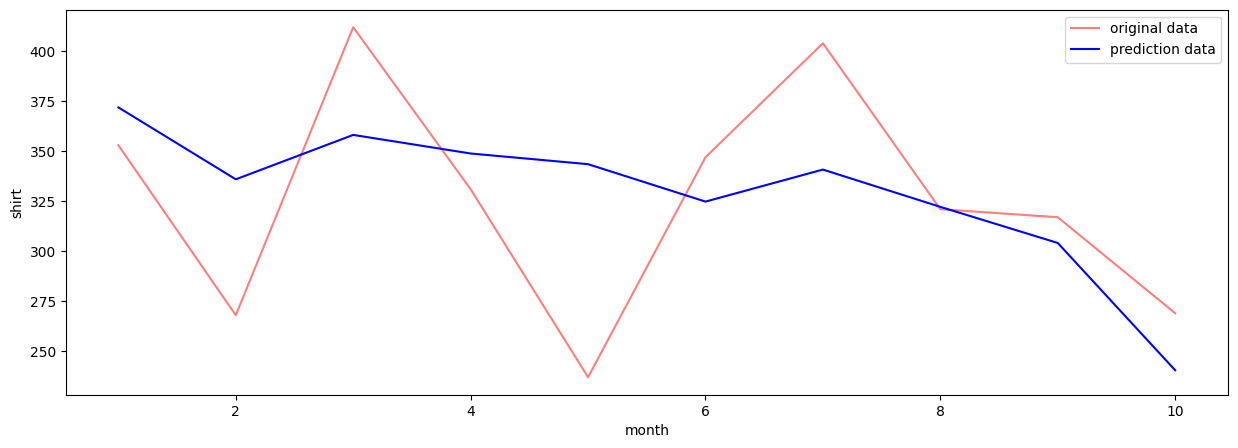

In [108]:
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(1, 1, 1)

sns.lineplot(data=df_ml_shirt, x='month',y='shirt',ax=ax, color='red',alpha=0.5, label='original data')
sns.lineplot(data=df_ml_shirt_pred, x='month',y='shirt_prediction',ax=ax, color='blue', label='prediction data')

plt.show()

**prediction of shirt sales in november and december**

In [109]:
# november and december
df_pred_shirt_sales = pd.DataFrame(pd.date_range(start="2021-01-01",end="2021-12-31"), columns=['order_date'])

from_ts = pd.to_datetime('2021-10-24')
to_ts = pd.to_datetime('2021-10-31')
df_pred_shirt_sales = df_pred_shirt_sales[~((df_pred_shirt_sales.order_date > from_ts) & (df_pred_sales.order_date <= to_ts))]

In [110]:
df_pred_shirt_sales

,order_date
0,2021-01-01
1,2021-01-02
2,2021-01-03
3,2021-01-04
4,2021-01-05
...,...
360,2021-12-27
361,2021-12-28
362,2021-12-29
363,2021-12-30


In [111]:
df_pred_shirt_sales['month'] = df_pred_shirt_sales['order_date'].dt.month
df_pred_shirt_sales['week'] = df_pred_shirt_sales['order_date'].dt.week
df_pred_shirt_sales['day'] = df_pred_shirt_sales['order_date'].dt.day
# df_pred_shirt_sales['order_date'] = df_pred_shirt_sales['order_date'].dt.date
df_pred_shirt_sales

<ipython-input-111-04ceae760c1e>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_pred_shirt_sales['week'] = df_pred_shirt_sales['order_date'].dt.week


,order_date,month,week,day
0,2021-01-01,1,53,1
1,2021-01-02,1,53,2
2,2021-01-03,1,53,3
3,2021-01-04,1,1,4
4,2021-01-05,1,1,5
...,...,...,...,...
360,2021-12-27,12,52,27
361,2021-12-28,12,52,28
362,2021-12-29,12,52,29
363,2021-12-30,12,52,30


In [112]:
df_pred_shirt_sales_std = df_pred_shirt_sales.copy()

In [113]:
std_columns = ['month','week','day']

for i in std_columns:
    df_pred_shirt_sales_std[i] = StandardScaler().fit_transform(df_pred_shirt_sales_std[i].values.reshape(len(df_pred_shirt_sales_std),1))

In [114]:
df_pred_shirt_sales['shirt_prediction'] = regressor.predict(df_pred_shirt_sales_std.drop(columns=['order_date'], axis=1))
df_pred_shirt_sales

,order_date,month,week,day,shirt_prediction
0,2021-01-01,1,53,1,11.759485
1,2021-01-02,1,53,2,11.841334
2,2021-01-03,1,53,3,11.923184
3,2021-01-04,1,1,4,11.345759
4,2021-01-05,1,1,5,11.427608
...,...,...,...,...,...
360,2021-12-27,12,52,27,11.246081
361,2021-12-28,12,52,28,11.327931
362,2021-12-29,12,52,29,11.409780
363,2021-12-30,12,52,30,11.491629


In [115]:
# monthly
df_ml_shirt_pred_nov = df_pred_shirt_sales.groupby(['month'], as_index=False)['shirt_prediction'].sum()

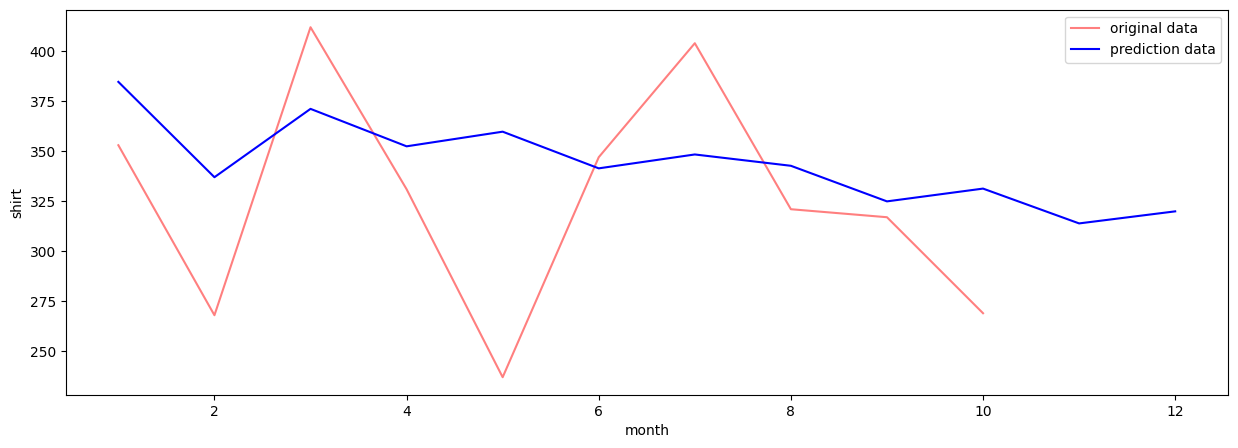

In [116]:
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(1, 1, 1)

sns.lineplot(data=df_ml_shirt, x='month',y='shirt',ax=ax, color='red',alpha=0.5, label='original data')
sns.lineplot(data=df_ml_shirt_pred_nov, x='month',y='shirt_prediction',ax=ax, color='blue', label='prediction data')

plt.show()

# 5. Answers to Business Problems and Business Recommendation

**Import some necessary libraries**

In [117]:
 !pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.3 MB/s eta 0:00:00


In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings("ignore")

### 5.1 Sales experienced a significant increase in the early Autumn and Winter seasons, then decreased significantly in the following month.

- Is there a correlation between the number of product sales and the season?
- Is there certain product that affects sales in certain seasons?
- How to reduce the decline in product sales (up to 25.32%) in all seasons?

In [119]:
season_dict = {
    1: 'Summer',
    2: 'Summer',
    3: 'Autumn',
    4: 'Autumn',
    5: 'Autumn',
    6: 'Winter',
    7: 'Winter',
    8: 'Winter',
    9: 'Spring',
    10: 'Spring',
    11: 'Spring',
    12: 'Summer'
}


df_ml_pred_nov.columns = df_ml.columns
df_ml_pred_nov_dec = df_ml_pred_nov.loc[10:11]
df_sales_all = pd.concat([df_ml,df_ml_pred_nov_dec], ignore_index=True)
df_sales_all['season'] =df_sales_all['month'].apply(lambda x: season_dict[x])
df_begin = df_sales_all[df_sales_all['month'].isin([3,4,6,7])]
df_end = df_sales_all[~(df_sales_all['month'].isin([3,4,6,7]))]
ftest = stats.f_oneway(df_begin['total_sales'], df_end['total_sales'])

# p-value
p_value = ftest.pvalue
alpha = 0.05
print('P-Value :',p_value)

if p_value >= alpha:
    print('There is no sufficient evidence to conclude that there is a significant correlation between changing seasons and total sales')
else:
    print('There is sufficient evidence to conclude that there is a significant correlation between changing seasons and total sales')

P-Value : 0.08604388406738633
There is no sufficient evidence to conclude that there is a significant correlation between changing seasons and total sales


In [120]:
df_sales_all.dtypes


month            int64
total_sales    float64
season          object
dtype: object

**Trousers**

In [121]:
df_ml_trousers_pred_nov.columns = df_ml_trousers.columns
df_ml_trousers_pred_nov_dec = df_ml_trousers_pred_nov.loc[10:11]
df_sales_trousers_all = pd.concat([df_ml_trousers,df_ml_trousers_pred_nov_dec], ignore_index=True)
df_sales_trousers_all['season'] =df_sales_trousers_all['month'].apply(lambda x: season_dict[x])
df_begin = df_sales_trousers_all[df_sales_trousers_all['month'].isin([3,4,6,7])]
df_end = df_sales_trousers_all[~(df_sales_trousers_all['month'].isin([3,4,6,7]))]
ftest = stats.f_oneway(df_begin['trousers'], df_end['trousers'])

# p-value
p_value = ftest.pvalue
alpha = 0.05
print('P-Value :',p_value)

if p_value >= alpha:
    print('There is no sufficient evidence to conclude that there is a significant correlation between changing seasons and total sales of trousers')
else:
    print('There is sufficient evidence to conclude that there is a significant correlation between changing seasons and total sales of trousers')

P-Value : 0.4175420073093347
There is no sufficient evidence to conclude that there is a significant correlation between changing seasons and total sales of trousers


**Jackets**

In [122]:
df_ml_jacket_pred_nov.columns = df_ml_jacket.columns
df_ml_jacket_pred_nov_dec = df_ml_jacket_pred_nov.loc[10:11]
df_sales_jacket_all = pd.concat([df_ml_jacket,df_ml_jacket_pred_nov_dec], ignore_index=True)
df_sales_jacket_all['season'] =df_sales_jacket_all['month'].apply(lambda x: season_dict[x])
df_begin = df_sales_jacket_all[df_sales_jacket_all['month'].isin([3,4,6,7])]
df_end = df_sales_jacket_all[~(df_sales_jacket_all['month'].isin([3,4,6,7]))]
ftest = stats.f_oneway(df_begin['jacket'], df_end['jacket'])

# p-value
p_value = ftest.pvalue
alpha = 0.05
print('P-Value :',p_value)

if p_value >= alpha:
    print('There is no sufficient evidence to conclude that there is a significant correlation between changing seasons and total sales of jacket')
else:
    print('There is sufficient evidence to conclude that there is a significant correlation between changing seasons and total sales of jacket')

P-Value : 0.3496367887994403
There is no sufficient evidence to conclude that there is a significant correlation between changing seasons and total sales of jacket


**Shirt**

In [123]:
df_ml_shirt_pred_nov.columns = df_ml_shirt.columns
df_ml_shirt_pred_nov_dec = df_ml_shirt_pred_nov.loc[10:11]
df_sales_shirt_all = pd.concat([df_ml_shirt,df_ml_shirt_pred_nov_dec], ignore_index=True)
df_sales_shirt_all['season'] =df_sales_shirt_all['month'].apply(lambda x: season_dict[x])
df_begin = df_sales_shirt_all[df_sales_shirt_all['month'].isin([3,4,6,7])]
df_end = df_sales_shirt_all[~(df_sales_shirt_all['month'].isin([3,4,6,7]))]
ftest = stats.f_oneway(df_begin['shirt'], df_end['shirt'])

# p-value
p_value = ftest.pvalue
alpha = 0.05
print('P-Value :',p_value)

if p_value >= alpha:
    print('There is no sufficient evidence to conclude that there is a significant correlation between changing seasons and total sales of shirt')
else:
    print('There is sufficient evidence to conclude that there is a significant correlation between changing seasons and total sales of shirt')

P-Value : 0.01116094846296871
There is sufficient evidence to conclude that there is a significant correlation between changing seasons and total sales of shirt


### 5.2 Overall sales in 2021 did not experience significant movement.

- How to increase product sales if it is proven that there is a decline in sales in 2021?
- What factors affect the decline in sales?

In [124]:
# pearson
(r,p_value) = stats.pearsonr(df_sales_all['month'], df_sales_all['total_sales'])
print('r:',r)
print('p-value:',p_value)

#if p-value < 0.05
#There is sufficient evidence to conclude that there is a significant linear relationship between x and y
#Because the correlation coefficient is significantly different from zero

r: -0.4410483704740323
p-value: 0.15122801787806905


**trousers**

In [125]:
# pearson
(r,p_value) = stats.pearsonr(df_sales_trousers_all['month'], df_sales_trousers_all['trousers'])
print('r:',r)
print('p-value:',p_value)

r: -0.3845486761386107
p-value: 0.21710676977989965


**jackets**

In [126]:
# pearson
(r,p_value) = stats.pearsonr(df_sales_jacket_all['month'], df_sales_jacket_all['jacket'])
print('r:',r)
print('p-value:',p_value)

r: -0.4094906150900982
p-value: 0.1861990751595595


**Shirt**

In [127]:
# pearson
(r,p_value) = stats.pearsonr(df_sales_shirt_all['month'], df_sales_shirt_all['shirt'])
print('r:',r)
print('p-value:',p_value)

r: -0.1735715226094911
p-value: 0.5895510485305187


- The correlation of sales of all products every month has decreased, as can be seen from the negative r value. However, the p-value > 0.05 indicates that although there was a decrease in sales, the decline was not significant or sales in 2021 were stagnant

# 6. Export Data

In [128]:
df_sales_all_export = df_sales_all.copy()
df_sales_jacket_export = df_sales_jacket_all.copy()
df_sales_shirt_export = df_sales_shirt_all.copy()
df_sales_trousers_export = df_sales_trousers_all.copy()

In [129]:
import calendar

In [130]:
df_sales_all_export['month'] = df_sales_all_export['month'].apply(lambda x: calendar.month_abbr[x])
df_sales_trousers_export['month'] = df_sales_trousers_export['month'].apply(lambda x: calendar.month_abbr[x])
df_sales_jacket_export['month'] = df_sales_jacket_export['month'].apply(lambda x: calendar.month_abbr[x])
df_sales_shirt_export['month'] = df_sales_shirt_export['month'].apply(lambda x: calendar.month_abbr[x])

In [131]:
from google.colab import files
df_sales_all_export.to_excel ("sales_prediction_all_products.xlsx", index = False, header=True)
files.download('sales_prediction_all_products.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [132]:
from google.colab import files
df_sales_trousers_export.to_excel ("sales_prediction_trousers.xlsx", index = False, header=True)
files.download('sales_prediction_trousers.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [133]:
from google.colab import files
df_sales_jacket_export.to_excel ("sales_prediction_jacket.xlsx", index = False, header=True)
files.download('sales_prediction_jacket.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [134]:
from google.colab import files
df_sales_shirt_export.to_excel ("sales_prediction_shirt.xlsx", index = False, header=True)
files.download('sales_prediction_shirt.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>